In [47]:
# import modules 
import networkx as nx
import numpy as np
from Embedding_Model import remove_html_tags
from sentence_transformers import SentenceTransformer, util
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from nltk import tokenize

import matplotlib.pyplot as plt

In [18]:
model = SentenceTransformer('all-mpnet-base-v2')
data = pd.read_excel("../../../data/UpdatedAgainTenders.xlsx")
data['Description'] = data['Description'].apply(remove_html_tags)
documents  = list(data['Description'])[:1000]
titles = list(data['Contract Title'])
ref = list(data['Reference Number'])

In [7]:
outputs = []
i = 0 

for item in documents:
    
    temp = []
    a = tokenize.sent_tokenize(item)
    
    temp.append(model.encode(a))
    
    sum_embeddings = np.sum(temp, axis=1)
    outputs.extend(sum_embeddings/len(temp))
    
    
    
    if i % 100 ==0:
        print(i)
    
    i +=1


0
100
200
300
400
500
600
700
800
900


In [8]:
embeddings_matrix = np.array(outputs)

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings_matrix)

In [83]:
# graph db class 

class graph_backend():
    def __init__(self,data,titles,reference_number,postcodes=None,distance='cosine'):
        
        self.data = data
        self.distance = distance
        self.titles = titles
        self.references = reference_number
        #self.postcodes = postcodes
        self.data_dict = dict()
        i = 0
        for title,ref in range(self.titles):
            self.data_dict[i] = [self.title[i],self.references[i],self.postcodes=[i]]
            i +=1
        
        # calculate distance
        if distance == 'cosine':
            self.embeddings_matrix = np.array(self.data)
            # Calculate the cosine similarity matrix
            self.similarity_matrix =  cosine_similarity(self.embeddings_matrix)
            
    def get_top_n(self,ref,n=5):
        ref_id = self.references.index(ref)
        sim = self.similarity_matrix[ref_id]
        sim_sort = np.argsort(sim)
        closest = sim_sort[-n:]
        return closest,sim
        
    def make_graph(self,ref,same_postcode=False,n=5):
        r,sim = self.get_top_n(ref)
        G = nx.Graph()
        for item in r:
            ref_id = self.data_dict[item][1]
            ref_post = self.data_dict[]
            if ref_id == ref:
                continue
            
            G.add_node(ref_id,postcode =self.data_dict[item] )
            G.add_edge(ref_id,ref,sim=sim_score)
            
            
        layout = nx.spring_layout(G)
        nx.draw(G, with_labels=True,node_size=500)
        
        
        # draw edge attributes
        edge_labels = nx.get_edge_attributes(G, 'sim')
        nx.draw_networkx_edge_labels(G,pos=layout,edge_labels=edge_labels)
        
        
        plt.show()

In [84]:
a = graph_backend(outputs,titles,ref)

ARA201901891
0.48772475
0.48830363
0.55427134
0.5987581


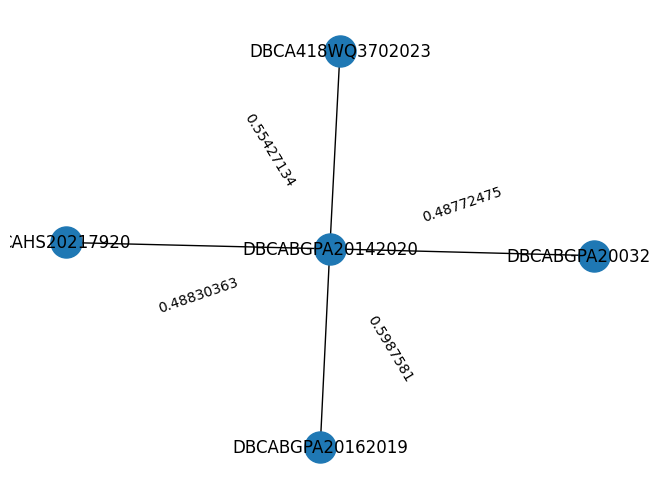

In [94]:
print(ref[0])
a.make_graph(ref[123])

[0 6 5 7 3]
